In [1]:
import pickle
import matplotlib.pyplot as plt

# import mod_kernik as kernik

#############################################
from scipy.integrate import ode, solve_ivp
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import bisect

sys.path.append('../')
sys.path.append('../Protocols')
sys.path.append('../Lib')
sys.path.append('../Models')
import simulator_scipy
import simulator_myokit
import model_response
from br1977 import BR1977
from ord2011 import ORD2011
import mod_kernik as kernik

import mod_trace as trace

import myokit

In [2]:
def get_high_fitness(ga_result):
    best_individual = ga_result.generations[0][0]

    for i, gen in enumerate(ga_result.generations):
        best_in_gen = ga_result.get_high_fitness_individual(i)
        if best_in_gen.fitness > best_individual.fitness:            
            best_individual = best_in_gen

    return best_individual

In [3]:
ga_result = 0
def plot_current_conributions(trial_conditions, prestep=2000, window=10, step_size=5, with_artefact=False):    
    model_name = trial_conditions.split('_')[0]
    currents = ['I_Na', 'I_Kr', 'I_Ks', 'I_To', 'I_CaL', 'I_K1', 'I_NaL' ]   
    if model_name=='BR1977':
        currents = ['I_Na', 'I_si', 'I_K1', 'I_x1']
    elif model_name=='Kernik':
        currents = ['I_Na', 'I_Kr', 'I_Ks', 'I_To', 'I_F', 'I_CaL', 'I_K1']
    elif model_name=='OHara2017':
        currents = ['INa', 'INaL', 'Ito', 'ICaL', 'IKr', 'IKs', 'IK1']

    for i, current in enumerate(currents):
        ga_result = pickle.load(open(f'ga_results/{trial_conditions}/ga_results_{current}_a{with_artefact}', 'rb'))
                
        best_individual = get_high_fitness(ga_result)
        protocol = best_individual.protocol
        print(protocol)
                
        tr = None
        if model_name=='ORD2011' :
            model = ORD2011(protocol)
            tr = model_response.get_model_response_JK(model, protocol, prestep=prestep)
        elif model_name=='OHara2017':            
            model = "../mmt-model-files/ohara-cipa-v1-2017_JK-v1.mmt"                                                            
            tr = model_response.get_model_response_with_myokit( model, protocol, prestep=prestep )            
        elif model_name=='BR1977' :
            model = BR1977(protocol)  
            tr = model_response.get_model_response_JK(model, protocol, prestep=prestep)
        elif model_name=='Kernik':
            k = kernik.KernikModel(is_exp_artefact=True)        
            tr = k.generate_response(protocol, is_no_ion_selective=False)
               
        tr.plot_currents_contribution(current,  window=window, step_size=step_size, is_shown=True, title=current,
                saved_to=f'./ga_results/{trial_conditions}/{current}.svg')
        
        print(tr.current_response_info.get_max_current_contributions(tr.t, window=window, step_size=step_size))
        print('-'*100)

|STEP: Voltage: -51.97933991984477, Duration: 272.77587242639436| + |STEP: Voltage: -119.92123657744665, Duration: 17.02165602903012| + |RAMP: Voltage Start: -46.17302516527064, Voltage End: -114.38921006317406, Duration: 311.5815616851431| + |STEP: Voltage: -12.360098125250603, Duration: 93.74611069003493|


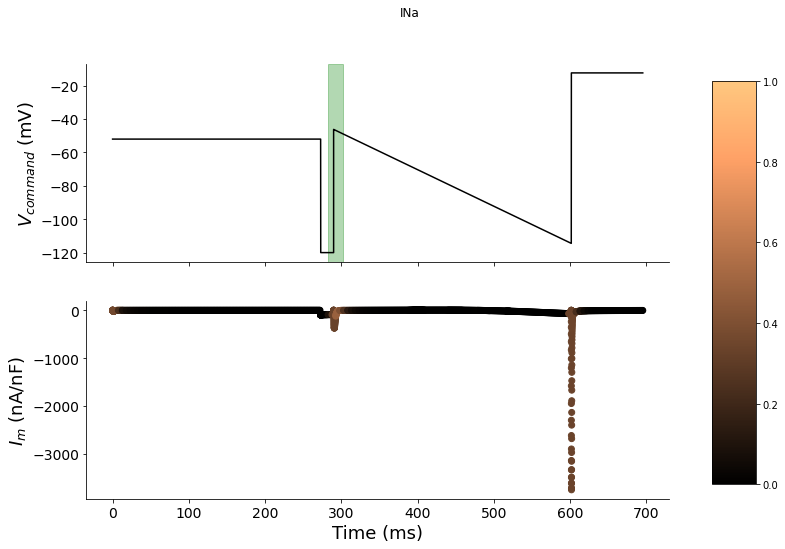

     Current  Contribution  Time Start  Time End
0      i_ion      0.000000         0.0      10.0
1        INa      0.487391       290.0     300.0
2       INaL      0.172432       685.0     695.0
3        Ito      0.031980       685.0     695.0
4       ICaL      0.260829       615.0     625.0
5      ICaNa      0.022086       615.0     625.0
6       ICaK      0.003979       615.0     625.0
7        IKr      0.229815       685.0     695.0
8        IKs      0.002221       685.0     695.0
9        IK1      0.498603       590.0     600.0
10     INaCa      0.080238       685.0     695.0
11  INaCa_ss      0.045799       620.0     630.0
12      INaK      0.115761       475.0     485.0
13       IKb      0.009556       685.0     695.0
14      INab      0.029307       475.0     485.0
15      ICab      0.033094       475.0     485.0
16      IpCa      0.000144       475.0     485.0
----------------------------------------------------------------------------------------------------
|STEP: Voltage: -

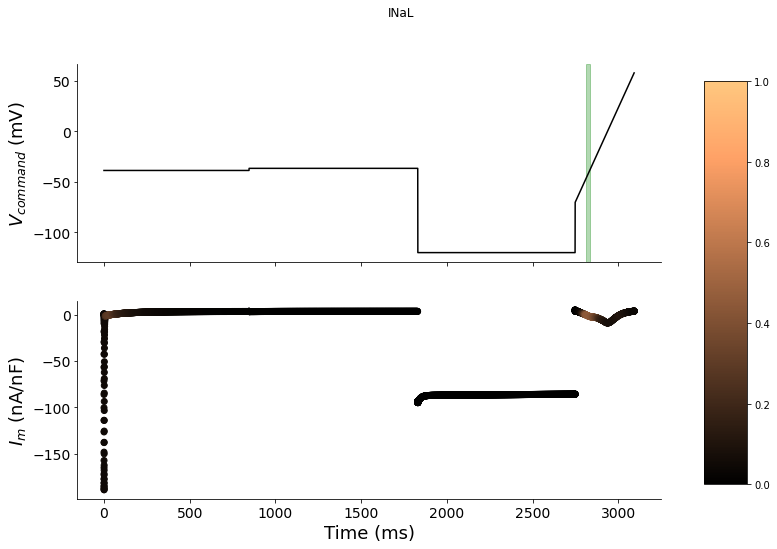

     Current  Contribution  Time Start  Time End
0      i_ion      0.000000         0.0      10.0
1        INa      0.392838         0.0      10.0
2       INaL      0.454228      2820.0    2830.0
3        Ito      0.041540      3005.0    3015.0
4       ICaL      0.364552      2940.0    2950.0
5      ICaNa      0.053914      3005.0    3015.0
6       ICaK      0.052678      3010.0    3020.0
7        IKr      0.403499      1815.0    1825.0
8        IKs      0.077372      3080.0    3090.0
9        IK1      0.499131      2735.0    2745.0
10     INaCa      0.062972      3080.0    3090.0
11  INaCa_ss      0.116077        25.0      35.0
12      INaK      0.055993        40.0      50.0
13       IKb      0.093538      3080.0    3090.0
14      INab      0.006312      2800.0    2810.0
15      ICab      0.006421      2800.0    2810.0
16      IpCa      0.000062        40.0      50.0
----------------------------------------------------------------------------------------------------
|STEP: Voltage: -

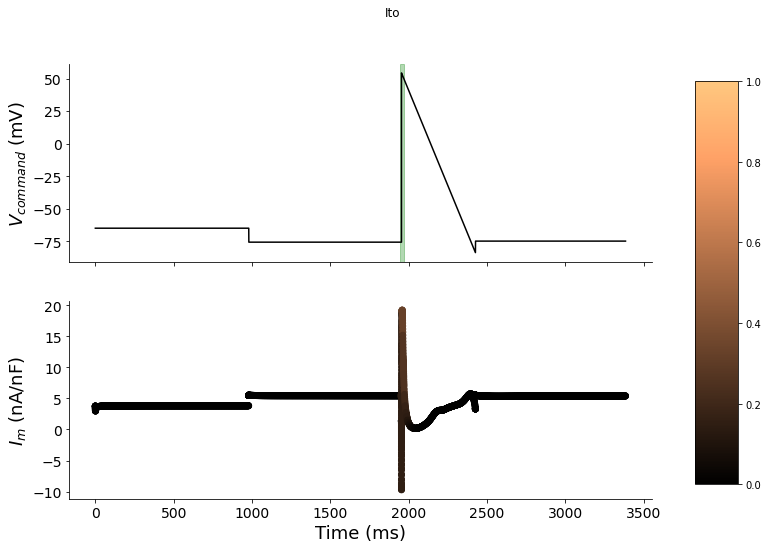

     Current  Contribution  Time Start  Time End
0      i_ion      0.000000         0.0      10.0
1        INa      0.162083      1945.0    1955.0
2       INaL      0.042338      2065.0    2075.0
3        Ito      0.326385      1955.0    1965.0
4       ICaL      0.352103      2030.0    2040.0
5      ICaNa      0.072974      2005.0    2015.0
6       ICaK      0.152083      1970.0    1980.0
7        IKr      0.422172      2210.0    2220.0
8        IKs      0.046698      2120.0    2130.0
9        IK1      0.486128      1390.0    1400.0
10     INaCa      0.042505      2165.0    2175.0
11  INaCa_ss      0.016837      2130.0    2140.0
12      INaK      0.053897      1945.0    1955.0
13       IKb      0.127927      1945.0    1955.0
14      INab      0.003508      2415.0    2425.0
15      ICab      0.003929      2415.0    2425.0
16      IpCa      0.000064      2045.0    2055.0
----------------------------------------------------------------------------------------------------
|STEP: Voltage: -

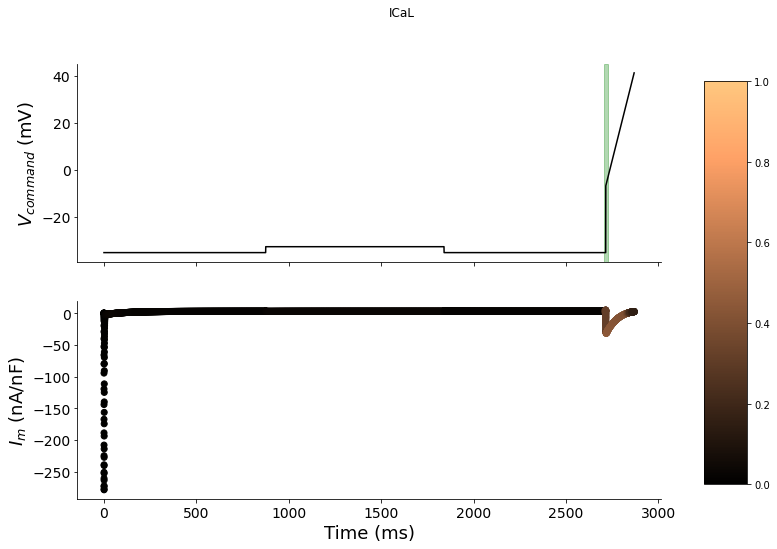

     Current  Contribution  Time Start  Time End
0      i_ion      0.000000         0.0      10.0
1        INa      0.373893         0.0      10.0
2       INaL      0.300640        45.0      55.0
3        Ito      0.034185        50.0      60.0
4       ICaL      0.450347      2715.0    2725.0
5      ICaNa      0.070684      2820.0    2830.0
6       ICaK      0.069661      2825.0    2835.0
7        IKr      0.422402      1825.0    1835.0
8        IKs      0.050370      2855.0    2865.0
9        IK1      0.111667        50.0      60.0
10     INaCa      0.048483        55.0      65.0
11  INaCa_ss      0.121716        20.0      30.0
12      INaK      0.051533        50.0      60.0
13       IKb      0.078049      2855.0    2865.0
14      INab      0.005013        50.0      60.0
15      ICab      0.004692        50.0      60.0
16      IpCa      0.000067        50.0      60.0
----------------------------------------------------------------------------------------------------
|STEP: Voltage: -

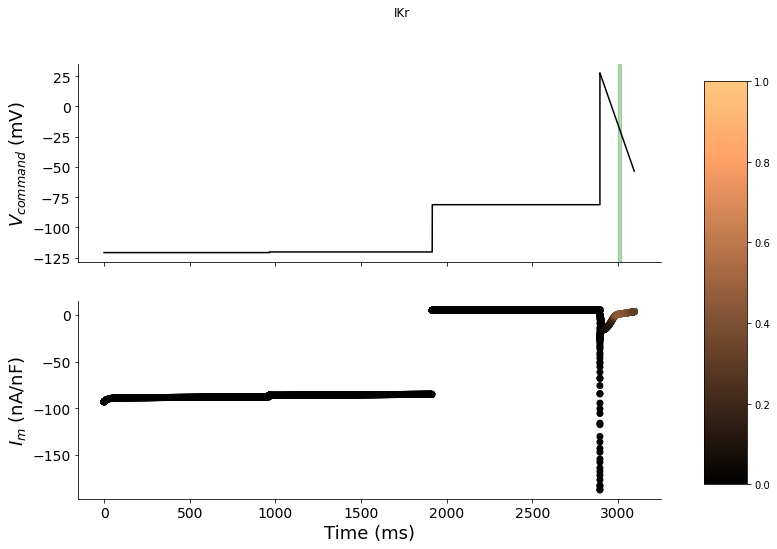

     Current  Contribution  Time Start  Time End
0      i_ion      0.000000         0.0      10.0
1        INa      0.195968      2890.0    2900.0
2       INaL      0.136266      2990.0    3000.0
3        Ito      0.154394      2900.0    2910.0
4       ICaL      0.394152      2910.0    2920.0
5      ICaNa      0.088526      2900.0    2910.0
6       ICaK      0.076732      2900.0    2910.0
7        IKr      0.445429      3005.0    3015.0
8        IKs      0.006899      2990.0    3000.0
9        IK1      0.499082         5.0      15.0
10     INaCa      0.114632      2990.0    3000.0
11  INaCa_ss      0.041888      2985.0    2995.0
12      INaK      0.034099      2885.0    2895.0
13       IKb      0.053659      2885.0    2895.0
14      INab      0.003013      1915.0    1925.0
15      ICab      0.003370      1915.0    1925.0
16      IpCa      0.000078      2990.0    3000.0
----------------------------------------------------------------------------------------------------
|STEP: Voltage: 6

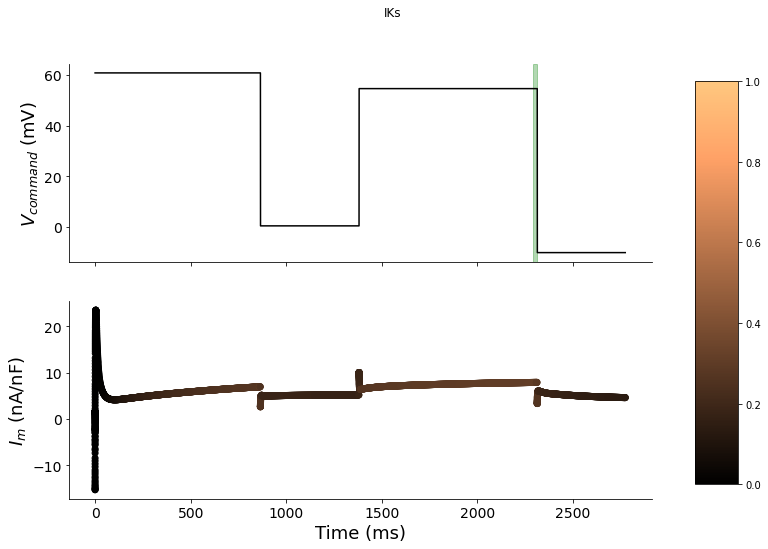

     Current  Contribution  Time Start  Time End
0      i_ion      0.000000         0.0      10.0
1        INa      0.160254         0.0      10.0
2       INaL      0.018444        75.0      85.0
3        Ito      0.265513         5.0      15.0
4       ICaL      0.061391        40.0      50.0
5      ICaNa      0.026434        20.0      30.0
6       ICaK      0.152600        20.0      30.0
7        IKr      0.332783      2760.0    2770.0
8        IKs      0.309395      2300.0    2310.0
9        IK1      0.004106      2310.0    2320.0
10     INaCa      0.072487       115.0     125.0
11  INaCa_ss      0.024323       885.0     895.0
12      INaK      0.045444         0.0      10.0
13       IKb      0.116687         0.0      10.0
14      INab      0.001160      2310.0    2320.0
15      ICab      0.000831      2310.0    2320.0
16      IpCa      0.000046       100.0     110.0
----------------------------------------------------------------------------------------------------
|STEP: Voltage: -

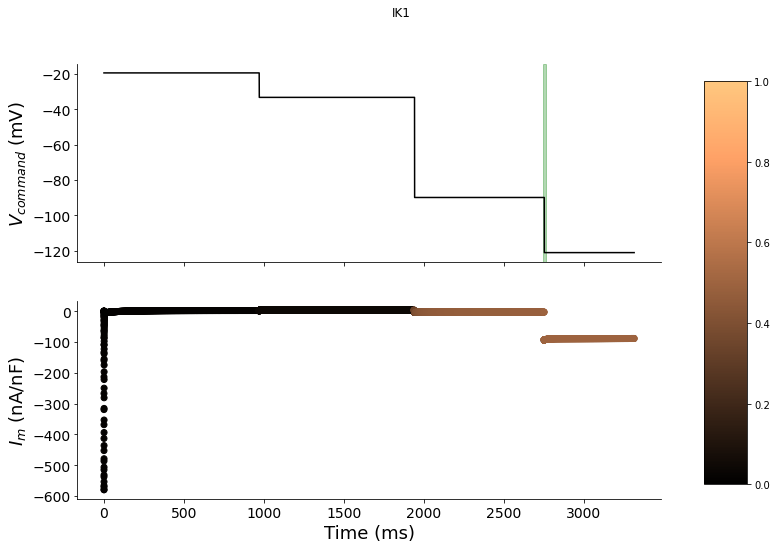

     Current  Contribution  Time Start  Time End
0      i_ion      0.000000         0.0      10.0
1        INa      0.342510         0.0      10.0
2       INaL      0.141223        55.0      65.0
3        Ito      0.033885         5.0      15.0
4       ICaL      0.261349       125.0     135.0
5      ICaNa      0.020219       125.0     135.0
6       ICaK      0.002724       125.0     135.0
7        IKr      0.436096       780.0     790.0
8        IKs      0.013638       960.0     970.0
9        IK1      0.499191      2755.0    2765.0
10     INaCa      0.071431        70.0      80.0
11  INaCa_ss      0.095647        10.0      20.0
12      INaK      0.031217       130.0     140.0
13       IKb      0.008553       130.0     140.0
14      INab      0.005971      2740.0    2750.0
15      ICab      0.006759      2740.0    2750.0
16      IpCa      0.000063       120.0     130.0
----------------------------------------------------------------------------------------------------
=====Complete====

In [4]:
if __name__ == '__main__':
    trial_conditions = "OHara2017_360_100_4_-121_61_10_5"
    plot_current_conributions(trial_conditions, prestep=2000, window=10, step_size=5, with_artefact=False)  
    print("=====Complete==============================")